In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import pymc3 as pm

from modules.models.chapter_6 import estimate_latent_ability_membership, estimate_latent_ability_hier

from modules.utils import validate_model, visualize_samples

In [9]:
PRPC_KWARGS={
    'samples': 1000
}
SAMPLING_KWARGS={
    'draws': 3000,
    'tune': 3000,
}
POPC_KWARGS={
    'samples': 1000
}

# Estimate Latet Ability Group Membership

C:\Users\penthotal\Desktop\git_repositories\learning_bayes\books\bayesian_cognitive_modelling\modules\utils.py:33: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(**sampling_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [latent_group_membership_p, latent_group_2_ability, latent_group_1_ability]
>BinaryGibbsMetropolis: [latent_group_membership]


Sampling 4 chains for 3_000 tune and 3_000 draw iterations (12_000 + 12_000 draws total) took 115 seconds.
The acceptance probability does not match the target. It is 0.8832313670117625, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
C:\Users\penthotal\miniconda3\envs\bayes_env\lib\site-packages\pymc3\sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


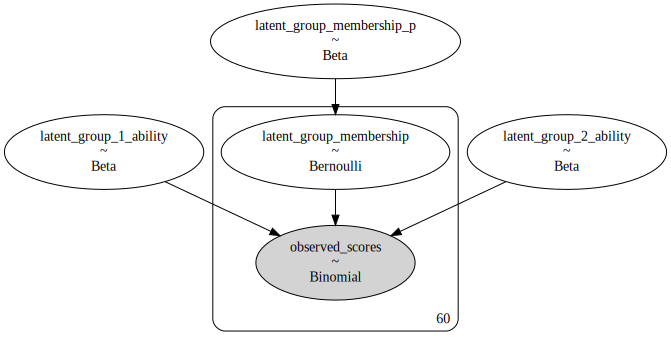

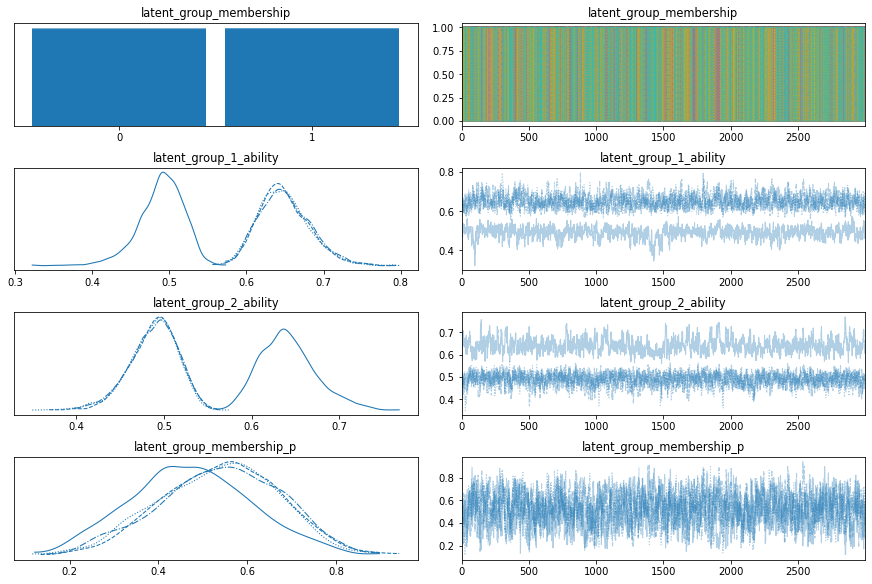

In [30]:
size_groups = 20
p_group_1 = 0.70
p_group_2 = 0.50
n_questions = 31

obs_scores = np.hstack(
    [
        np.random.binomial(n=n_questions, p=p_group_1, size=size_groups),
        np.random.binomial(n=n_questions, p=p_group_2, size=size_groups*2)
    ]
)

model = estimate_latent_ability_membership(
    obs_scores=obs_scores,
    number_questions=31,
    # if we don't specify informative priors
    # the model is not able to efficiently distinguish
    # between groups
    beta_1_kwargs={
        'alpha': 4,
        'beta': 2
    }, 
    beta_2_kwargs={
        'alpha': 2,
        'beta': 4
    },
    beta_bernoulli_kwargs={
        'alpha': 5,
        'beta': 5
    }
)

plate, prpc, trace, popc = validate_model(
    model,
    PRPC_KWARGS,
    SAMPLING_KWARGS,
    POPC_KWARGS
)
plate

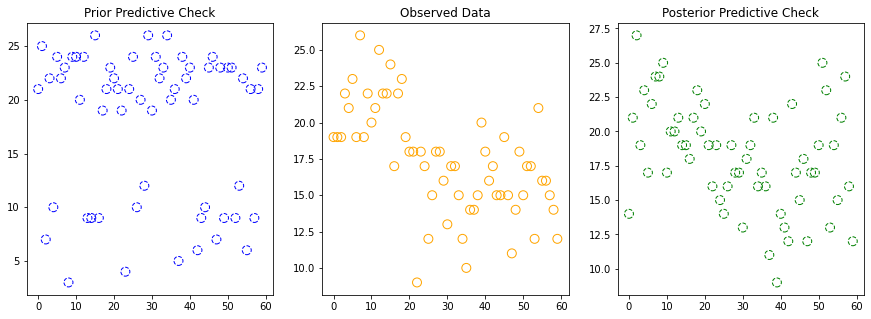

In [31]:
visualize_samples(
    observed=obs_scores, 
    prpc=prpc['observed_scores'][0, :], 
    popc=popc['observed_scores'][0, :],
    s=80
)

# Estimate Latet Ability (Hierarchically) and Group Membership

C:\Users\penthotal\Desktop\git_repositories\learning_bayes\books\bayesian_cognitive_modelling\modules\utils.py:33: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(**sampling_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [latent_group_2_ability, hyper_b_beta_2, hyper_a_beta_2, latent_group_1_ability, hyper_b_beta_1, hyper_a_beta_1]
>BinaryGibbsMetropolis: [latent_group_membership]


Sampling 4 chains for 3_000 tune and 3_000 draw iterations (12_000 + 12_000 draws total) took 208 seconds.
C:\Users\penthotal\miniconda3\envs\bayes_env\lib\site-packages\arviz\stats\diagnostics.py:561: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
The number of effective samples is smaller than 10% for some parameters.
C:\Users\penthotal\miniconda3\envs\bayes_env\lib\site-packages\pymc3\sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


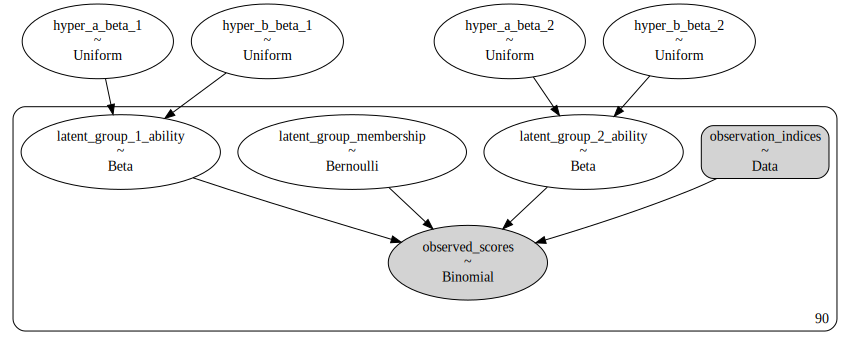

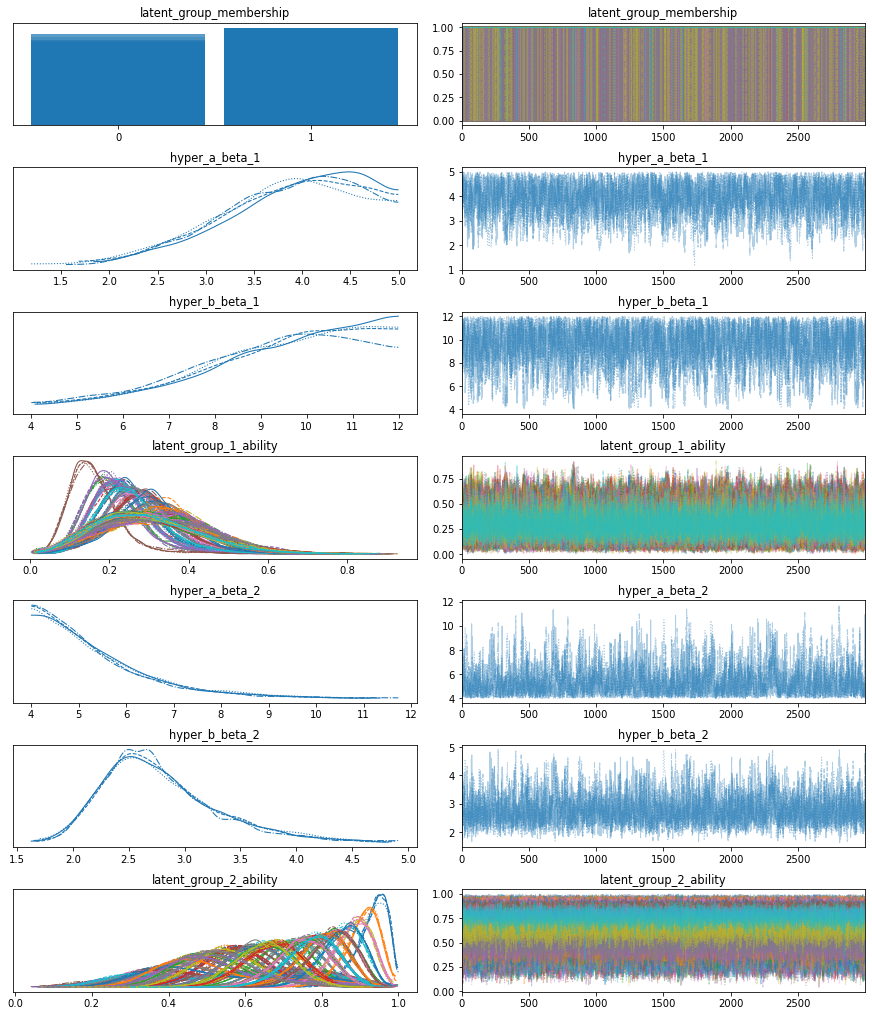

In [21]:
size_groups = 30
n_questions = 31

obs_scores = np.hstack(
    [
        np.random.binomial(n=n_questions, p=np.random.beta(a=3, b=7, size=size_groups)),
        np.random.binomial(n=n_questions, p=np.random.beta(a=7, b=3, size=size_groups*2))
    ]
)

model = estimate_latent_ability_hier(
    obs_scores=obs_scores,
    number_questions=31,
    a_beta_1_kwargs={
        'lower': 1,
        'upper': 5
    }, 
    b_beta_1_kwargs={
        'lower': 4,
        'upper': 12
    }, 
    a_beta_2_kwargs={
        'lower': 4,
        'upper': 12
    }, 
    b_beta_2_kwargs={
        'lower': 1,
        'upper': 5
    }, 
    bernoulli_kwargs={
        'p': 0.8
    }
)

plate, prpc, trace, popc = validate_model(
    model,
    PRPC_KWARGS,
    SAMPLING_KWARGS,
    POPC_KWARGS
)
plate

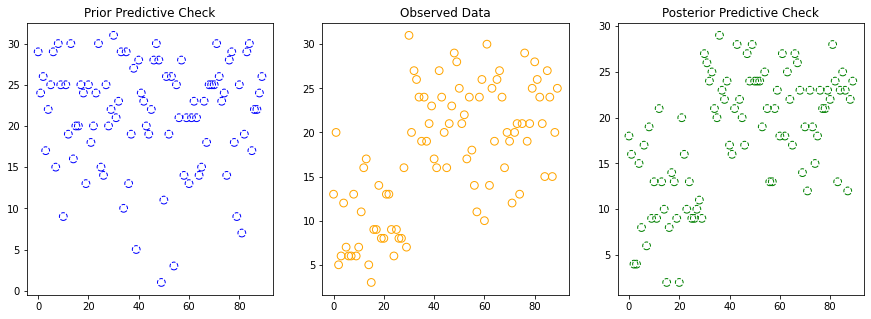

In [23]:
visualize_samples(
    observed=obs_scores, 
    prpc=prpc['observed_scores'][0, :], 
    popc=popc['observed_scores'][0, :],
    s=60
)